In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings("ignore")

In [2]:
cols = []
for i in range(1, 14):
    cols.append('x_{}'.format(i))

In [3]:
X, y = load_boston(return_X_y=True)
X = pd.DataFrame(X, columns = cols)
X

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
def standardize(data):
    data = [(value - np.mean(data)) / np.std(data) for value in data]
    return data

X = X.apply(standardize)
y = standardize(y)

In [5]:
# def normalize(data):
#     data = [(value - np.mean(data))/ (np.max(data)- np.min(data)) for value in data]
#     return data

# X = X.apply(normalize)
# y = normalize(y)

# Linear Regression with one variable

In [6]:
X_one = X['x_13']
# y

In [ ]:
plt.scatter(X_one, y)

In [ ]:
def f(X, theta0, theta1):
    return theta0 + theta1 * X

def cost_function(X, y, theta0, theta1):
    m = X.shape[0]
    y_hat = f(X, theta0,   theta1)
    mse = np.sum(np.square(y_hat-y))
    return mse/ (2*m)

def gradient_descent(learning_rate, X, y, theta0, theta1):
    m = X.shape[0]
    y_hat = f(X, theta0, theta1)
    theta0 -= ((learning_rate / m) * (np.sum(y_hat-y)))
    theta1 -= ((learning_rate / m) * np.dot((y_hat-y), X))
    return theta0, theta1

In [ ]:
def main(X):
    theta0, theta1 = random.random(), random.random()
#     print(theta0, theta1)
    j = cost_function(X, y, theta0, theta1)
#     print(j)
    js = []
    while True: 
        theta0, theta1 = gradient_descent(0.1, X, y, theta0, theta1)
#         print(theta0, theta1)
        j_new = cost_function(X, y, theta0, theta1)
#         print(j_new)
        if j_new < j:
            js.append(j_new)
            j = j_new
#             print(j)
            pass
        else:
            break
    return theta0, theta1, js 
    
theta0, theta1, js = main(X_one)

In [ ]:
print(theta0, theta1)

In [ ]:
plt.plot(js)

In [ ]:
plt.scatter(X_one, y)
y_hat = f(X_one, theta0, theta1)
plt.plot(X_one, y_hat,'r')

In [ ]:
error = cost_function(X_one, y, theta0, theta1)
print(error)

In [ ]:
y_hat

In [ ]:
y = pd.DataFrame(y)

In [ ]:
df = pd.concat([X_one, y, y_hat], axis=1)
# df = df.rename(index={'x_13':'x', '0':'y', 'x_13':' y_hat'})
df.columns = ['x','y','y_hat']
df

# Linear Regression with multiple variables

In [ ]:
X

In [ ]:
X.shape

In [ ]:
def f(X, thetas):
    return np.dot(thetas, X.T)

def cost_function(X, y, thetas):
    m = X.shape[0]
    y_hat = f(X, thetas)
    mse = np.sum(np.square(y_hat-y))
    return mse / (2*m)  

def gradient_descent(learning_rate, X, y, thetas):
    m, n = X.shape
    y_hat = f(X, thetas)
    for i in range(n):
        thetas[i] -= (learning_rate / m) * np.dot(y_hat-y, X[X.columns[i]])
    return thetas

In [ ]:
def main(X, y):
    X = pd.concat([pd.DataFrame(np.ones(X.shape[0])), X], axis=1)
    thetas = np.ones(X.shape[1])
#     print(X.shape)
    j = cost_function(X, y, thetas)
#     print(j)
    js = []
    while True:
        thetas = gradient_descent(0.01, X, y, thetas)
        j_new = cost_function(X, y, thetas)
#         print(j_new)
#         print(thetas)
        if j_new < j:
            js.append(j_new)
            j = j_new
            pass
        else:
            break
    return thetas, js



In [ ]:
thetas, js = main(X, y)

In [ ]:
print(thetas)

In [ ]:
plt.plot(js)

In [ ]:
X = pd.concat([pd.DataFrame(np.ones(X.shape[0])), X], axis=1)

In [ ]:
error = cost_function(X, y, thetas)
print(error)

# SkLearn

## with 1 variable

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_one = X_one.values.reshape(-1,1)
lr.fit(X_one, y)
y_hat = lr.predict(X_one)
plt.scatter(X_one, y)
plt.plot(X_one, y_hat,'r')
print(lr.coef_[0], lr.intercept_)


In [ ]:
def mse(y, y_hat):
    m = len(y)
    mse = np.sum(np.square(y_hat-y))
    return mse/ (2*m)

print(mse(y,y_hat))

## with multiple variables

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
y_hat = lr.predict(X)
# plt.scatter(X, y)
# plt.plot(X, y_hat,'r')
print(lr.coef_, lr.intercept_)


In [ ]:
print(mse(y,y_hat))

# Linear Regression Class 

In [7]:
class LinearRegression():
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, thetas):
        return np.dot(thetas, self.X.T)

    def _cost_function(self, thetas):
        m = self.X.shape[0]
        y_hat = self.predict(thetas)
        mse = np.sum(np.square(y_hat-self.y))
        return mse / (2*m)  

    def _gradient_descent(self, thetas, learning_rate):
        m, n = self.X.shape
        y_hat = self.predict(thetas)
        for i in range(n):
            thetas[i] -= (learning_rate / m) * np.dot(y_hat-y, X[X.columns[i]])
        return thetas
    
    def fit(self, learning_rate=0.1):
        X = pd.concat([pd.DataFrame(np.ones(self.X.shape[0])), self.X], axis=1)
        thetas = np.ones(self.X.shape[1])
        j = self._cost_function(thetas)
        js = []
        while True:
            thetas = self._gradient_descent(thetas, learning_rate)
            j_new = self._cost_function(thetas)
            if j_new < j:
                js.append(j_new)
                j = j_new
                pass
            else:
                break
        return thetas, js

In [8]:
linear_regression = LinearRegression(X, y)
thetas, costs = linear_regression.fit(0.1)

In [9]:
y_hat = linear_regression.predict(thetas)

In [10]:
print(thetas)

[-0.10101706  0.11771518  0.01533512  0.07419884 -0.22384801  0.29105648
  0.00211863 -0.33783635  0.28974886 -0.22603146 -0.22427122  0.09243223
 -0.40744693]


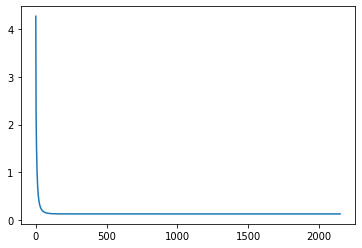

In [11]:
plt.plot(costs)

In [12]:
def mse(y, y_hat):
    m = len(y)
    mse = np.sum(np.square(y_hat-y))
    return mse/ (2*m)

error = mse(y, y_hat)
print(error)

0.12967866794529842
